## How the new Covid-19 vaccine from Pfizer and BioNTech was received by Tweeter Public

In [152]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,10]
#%matplotlib inline

In [153]:
vaccineTweet_DF = pd.read_csv('vaccination_tweets.csv')
vaccineTweet_DF.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1340217437569114112,Spooky,"Wherever I go, there I am.","There's coffee in that Nebula!, Pleased to mee...",2013-06-10 20:37:48,294,166,48957,False,2020-12-19 08:48:31,@megtirrell #PfizerBioNTech Ship it out anywa...,['PfizerBioNTech'],Twitter Web App,0,0,False
2,1339443533258887168,TRAVEL LOG,"Islamabad, Pakistan",To become the foremost Destination Management ...,2013-06-06 09:54:00,492,813,36,False,2020-12-17 05:33:18,Naltar Valley with AZ\nhttps://t.co/ktARF1n7L3...,"['Pfizer', 'PfizerCOVIDvaccine', 'PfizerBioNTe...",Twitter Web App,0,0,False
3,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
4,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False


In [154]:
vaccineTweet_DF.shape

(1035, 16)

In [155]:
# Checking null
vaccineTweet_DF.isnull().sum()

id                    0
user_name             0
user_location       225
user_description     56
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
text                  0
hashtags            290
source                0
retweets              0
favorites             0
is_retweet            0
dtype: int64

In [156]:
# User location and hashtags and descripton NULL values will be replace with unknown and None, and NoDesc respectivetly 
vaccineTweet_DF['user_location'].fillna('Unknown', inplace=True)
vaccineTweet_DF['hashtags'].fillna('None', inplace=True)
vaccineTweet_DF['user_description'].fillna('NoDesc', inplace=True)

In [157]:
vaccineTweet_DF.isnull().sum()

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

In [158]:
vaccineTweet_DF.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1340217437569114112,Spooky,"Wherever I go, there I am.","There's coffee in that Nebula!, Pleased to mee...",2013-06-10 20:37:48,294,166,48957,False,2020-12-19 08:48:31,@megtirrell #PfizerBioNTech Ship it out anywa...,['PfizerBioNTech'],Twitter Web App,0,0,False
2,1339443533258887168,TRAVEL LOG,"Islamabad, Pakistan",To become the foremost Destination Management ...,2013-06-06 09:54:00,492,813,36,False,2020-12-17 05:33:18,Naltar Valley with AZ\nhttps://t.co/ktARF1n7L3...,"['Pfizer', 'PfizerCOVIDvaccine', 'PfizerBioNTe...",Twitter Web App,0,0,False
3,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,None,Twitter Web App,1,1,False
4,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False


## Analazing data with NLP

In [159]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/damian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [160]:
# Plan is to analyze text and hashtags columns 
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [161]:
# Remove punctuation FUNCTION
def remove_punctuation(text):
    for eachPunct in string.punctuation:
        text = text.replace(eachPunct, '')
    return text 

In [162]:
vaccineTweet_DF['text'] = vaccineTweet_DF['text'].apply(remove_punctuation)
vaccineTweet_DF.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1340217437569114112,Spooky,"Wherever I go, there I am.","There's coffee in that Nebula!, Pleased to mee...",2013-06-10 20:37:48,294,166,48957,False,2020-12-19 08:48:31,megtirrell PfizerBioNTech Ship it out anyway ...,['PfizerBioNTech'],Twitter Web App,0,0,False
2,1339443533258887168,TRAVEL LOG,"Islamabad, Pakistan",To become the foremost Destination Management ...,2013-06-06 09:54:00,492,813,36,False,2020-12-17 05:33:18,Naltar Valley with AZ\nhttpstcoktARF1n7L3\nPfi...,"['Pfizer', 'PfizerCOVIDvaccine', 'PfizerBioNTe...",Twitter Web App,0,0,False
3,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,None,Twitter Web App,1,1,False
4,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,coronavirus SputnikV AstraZeneca PfizerBioNTec...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False


In [163]:
vaccineTweet_DF.shape

(1035, 16)

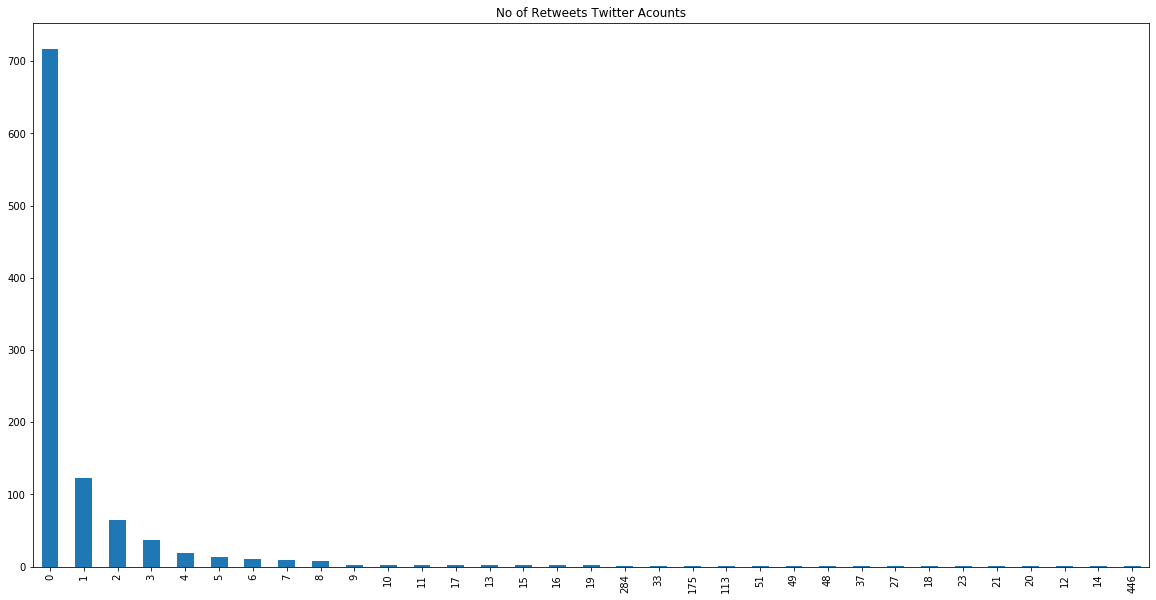

In [164]:
# Let's check some retweets 
vaccineTweet_DF['retweets'].value_counts().plot(kind='bar', title='No of Retweets Twitter Acounts')

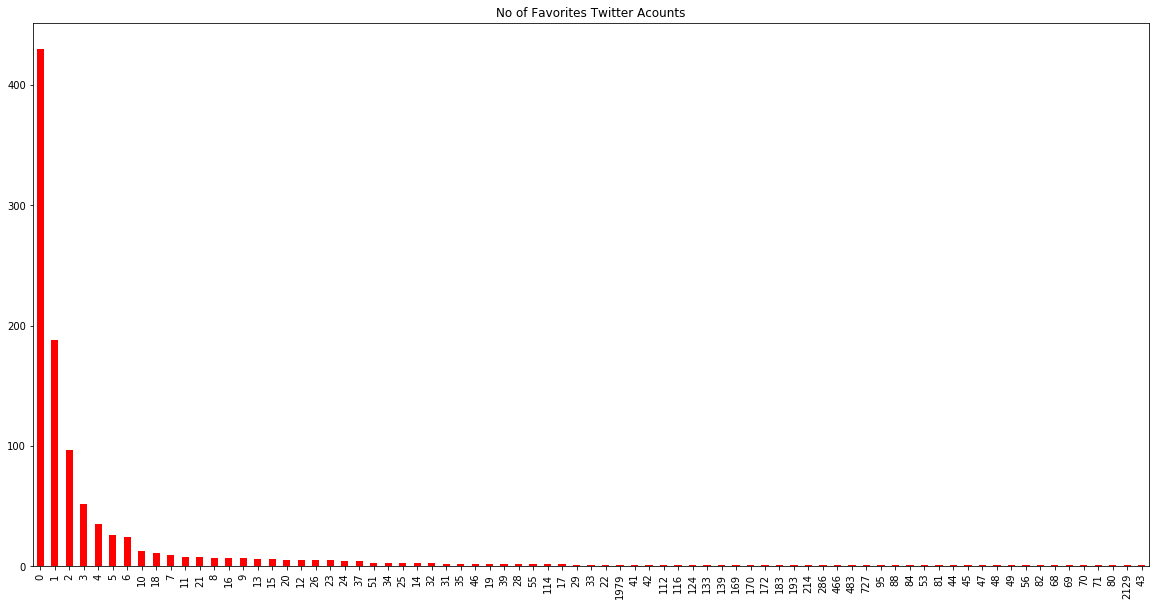

In [165]:
vaccineTweet_DF['favorites'].value_counts().plot(kind='bar', color='red',title='No of Favorites Twitter Acounts')

In [166]:
# Let's do some tokenize FUNCTION  
from nltk.tokenize import word_tokenize
def tokenize_text(text):
    text = word_tokenize(text.lower())
    return text

In [167]:
# Apply the tokenize function to the text column
vaccineTweet_DF['text'] = vaccineTweet_DF['text'].apply(tokenize_text)
vaccineTweet_DF.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,"[same, folks, said, daikon, paste, could, trea...",['PfizerBioNTech'],Twitter for Android,0,0,False
1,1340217437569114112,Spooky,"Wherever I go, there I am.","There's coffee in that Nebula!, Pleased to mee...",2013-06-10 20:37:48,294,166,48957,False,2020-12-19 08:48:31,"[megtirrell, pfizerbiontech, ship, it, out, an...",['PfizerBioNTech'],Twitter Web App,0,0,False
2,1339443533258887168,TRAVEL LOG,"Islamabad, Pakistan",To become the foremost Destination Management ...,2013-06-06 09:54:00,492,813,36,False,2020-12-17 05:33:18,"[naltar, valley, with, az, httpstcoktarf1n7l3,...","['Pfizer', 'PfizerCOVIDvaccine', 'PfizerBioNTe...",Twitter Web App,0,0,False
3,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"[while, the, world, has, been, on, the, wrong,...",None,Twitter Web App,1,1,False
4,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,"[coronavirus, sputnikv, astrazeneca, pfizerbio...","['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False


In [168]:
#pip install textblob

In [169]:
#pip install langdetect 

In [170]:
from langdetect import detect
from textblob import TextBlob    
myword = detect("hello")
myword

'fi'

In [171]:
# stop words FUNCTION
from nltk.corpus import stopwords
def remove_stopwords(text):
    #global stopwords
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if not word in stop_words]
    return text

In [172]:
vaccineTweet_DF['text'] = vaccineTweet_DF['text'].apply(remove_stopwords)
vaccineTweet_DF

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,"[folks, said, daikon, paste, could, treat, cyt...",['PfizerBioNTech'],Twitter for Android,0,0,False
1,1340217437569114112,Spooky,"Wherever I go, there I am.","There's coffee in that Nebula!, Pleased to mee...",2013-06-10 20:37:48,294,166,48957,False,2020-12-19 08:48:31,"[megtirrell, pfizerbiontech, ship, anyway, get...",['PfizerBioNTech'],Twitter Web App,0,0,False
2,1339443533258887168,TRAVEL LOG,"Islamabad, Pakistan",To become the foremost Destination Management ...,2013-06-06 09:54:00,492,813,36,False,2020-12-17 05:33:18,"[naltar, valley, az, httpstcoktarf1n7l3, pfize...","['Pfizer', 'PfizerCOVIDvaccine', 'PfizerBioNTe...",Twitter Web App,0,0,False
3,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"[world, wrong, side, history, year, hopefully,...",None,Twitter Web App,1,1,False
4,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,"[coronavirus, sputnikv, astrazeneca, pfizerbio...","['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1337869568069480450,Bruno Rodrigues,"Houston, TX",🫁PCCM fellow🫀@BCMHouston @BCM_Lung @TXMedCente...,2020-03-09 21:37:31,527,1230,2123,False,2020-12-12 21:18:56,"[coming, vaccine, soon, excited, covidvaccine,...","['CovidVaccine', 'covid19', 'Pfizervaccine', '...",Twitter for iPhone,0,2,False
1031,1337864584548536321,"Taryn Schuelke, CT, CCLS","Houston, TX",#PedPC Grief and Bereavement Specialist @Texas...,2017-09-13 18:04:33,306,616,780,False,2020-12-12 20:59:07,"[beyond, relieved, share, ’, among, first, rec...","['CovidVaccine', 'PfizerBioNTech']",Twitter for iPhone,2,4,False
1032,1337863050158804992,🚶🏻Curtis S. Chin,Tweets on #Asia & USA,Former US Ambassador•Board/Biz Executive•Milke...,2013-12-29 22:15:53,11877,312,59319,True,2020-12-12 20:53:02,"[twitterpoll, dyk, uk, bahrain, canada, amp, u...","['TwitterPoll', 'UK', 'Bahrain', 'Canada', 'US...",Twitter for iPad,4,2,False
1033,1337862648524926981,Furfuroll,"Moscow, Russia","Люблю окружающих, близких и дальних. The most ...",2010-05-08 08:59:09,418,63,10720,False,2020-12-12 20:51:26,"[coronavirus, sputnikv, astrazeneca, pfizerbio...","['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False


In [173]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/damian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [174]:
# Lemmatization FUNCTION
def lemmatize_words(text):
    wn = nltk.WordNetLemmatizer()
    text = [wn.lemmatize(word) for word in text]
    return text


In [175]:
#vaccineTweet_DF['text'] = vaccineTweet_DF.apply(lemmatize_words)

In [176]:
from nltk.stem import PorterStemmer

In [177]:
# Stemming 
def stemming_word(text):
    porter = PorterStemmer()
    text = [porter.stem(t) for t in text]
    return text

In [178]:
vaccineTweet_DF['text'].apply(stemming_word)
vaccineTweet_DF.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,"[folks, said, daikon, paste, could, treat, cyt...",['PfizerBioNTech'],Twitter for Android,0,0,False
1,1340217437569114112,Spooky,"Wherever I go, there I am.","There's coffee in that Nebula!, Pleased to mee...",2013-06-10 20:37:48,294,166,48957,False,2020-12-19 08:48:31,"[megtirrell, pfizerbiontech, ship, anyway, get...",['PfizerBioNTech'],Twitter Web App,0,0,False
2,1339443533258887168,TRAVEL LOG,"Islamabad, Pakistan",To become the foremost Destination Management ...,2013-06-06 09:54:00,492,813,36,False,2020-12-17 05:33:18,"[naltar, valley, az, httpstcoktarf1n7l3, pfize...","['Pfizer', 'PfizerCOVIDvaccine', 'PfizerBioNTe...",Twitter Web App,0,0,False
3,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"[world, wrong, side, history, year, hopefully,...",None,Twitter Web App,1,1,False
4,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,"[coronavirus, sputnikv, astrazeneca, pfizerbio...","['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False


In [179]:
from textblob import TextBlob

In [180]:
# Polarity and Subjectivity
def sentiment_analysis(text):
    analisys = TextBlob(text).sentiment
    return analisys

vaccineTweet_DF.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,"[folks, said, daikon, paste, could, treat, cyt...",['PfizerBioNTech'],Twitter for Android,0,0,False
1,1340217437569114112,Spooky,"Wherever I go, there I am.","There's coffee in that Nebula!, Pleased to mee...",2013-06-10 20:37:48,294,166,48957,False,2020-12-19 08:48:31,"[megtirrell, pfizerbiontech, ship, anyway, get...",['PfizerBioNTech'],Twitter Web App,0,0,False
2,1339443533258887168,TRAVEL LOG,"Islamabad, Pakistan",To become the foremost Destination Management ...,2013-06-06 09:54:00,492,813,36,False,2020-12-17 05:33:18,"[naltar, valley, az, httpstcoktarf1n7l3, pfize...","['Pfizer', 'PfizerCOVIDvaccine', 'PfizerBioNTe...",Twitter Web App,0,0,False
3,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"[world, wrong, side, history, year, hopefully,...",None,Twitter Web App,1,1,False
4,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,"[coronavirus, sputnikv, astrazeneca, pfizerbio...","['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False


In [181]:
# To String
def listToStr(myList):
    if type(myList) is list:
        return ";".join(myList)
    else:
        return myList

In [182]:
vaccineTweet_DF['text'].apply(lambda x: [listToStr(i) for i in x])

0       [folks, said, daikon, paste, could, treat, cyt...
1       [megtirrell, pfizerbiontech, ship, anyway, get...
2       [naltar, valley, az, httpstcoktarf1n7l3, pfize...
3       [world, wrong, side, history, year, hopefully,...
4       [coronavirus, sputnikv, astrazeneca, pfizerbio...
                              ...                        
1030    [coming, vaccine, soon, excited, covidvaccine,...
1031    [beyond, relieved, share, ’, among, first, rec...
1032    [twitterpoll, dyk, uk, bahrain, canada, amp, u...
1033    [coronavirus, sputnikv, astrazeneca, pfizerbio...
1034    [fascinating, see, messenger, rna, vaccine, de...
Name: text, Length: 1035, dtype: object

In [183]:
vaccineTweet_DF['stringText'] = vaccineTweet_DF['text'].apply(lambda x: x[1:])
vaccineTweet_DF.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,stringText
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,"[folks, said, daikon, paste, could, treat, cyt...",['PfizerBioNTech'],Twitter for Android,0,0,False,"[said, daikon, paste, could, treat, cytokine, ..."
1,1340217437569114112,Spooky,"Wherever I go, there I am.","There's coffee in that Nebula!, Pleased to mee...",2013-06-10 20:37:48,294,166,48957,False,2020-12-19 08:48:31,"[megtirrell, pfizerbiontech, ship, anyway, get...",['PfizerBioNTech'],Twitter Web App,0,0,False,"[pfizerbiontech, ship, anyway, get, hospitals,..."
2,1339443533258887168,TRAVEL LOG,"Islamabad, Pakistan",To become the foremost Destination Management ...,2013-06-06 09:54:00,492,813,36,False,2020-12-17 05:33:18,"[naltar, valley, az, httpstcoktarf1n7l3, pfize...","['Pfizer', 'PfizerCOVIDvaccine', 'PfizerBioNTe...",Twitter Web App,0,0,False,"[valley, az, httpstcoktarf1n7l3, pfizer, pfize..."
3,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"[world, wrong, side, history, year, hopefully,...",None,Twitter Web App,1,1,False,"[wrong, side, history, year, hopefully, bigges..."
4,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,"[coronavirus, sputnikv, astrazeneca, pfizerbio...","['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,"[sputnikv, astrazeneca, pfizerbiontech, modern..."


In [184]:
vaccineTweet_DF['text'] = vaccineTweet_DF['text'].astype(str)

In [185]:
vaccineTweet_DF['senti_score'] = vaccineTweet_DF['text'].apply(sentiment_analysis)

In [186]:
vaccineTweet_DF.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,stringText,senti_score
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,"['folks', 'said', 'daikon', 'paste', 'could', ...",['PfizerBioNTech'],Twitter for Android,0,0,False,"[said, daikon, paste, could, treat, cytokine, ...","(0.0, 0.0)"
1,1340217437569114112,Spooky,"Wherever I go, there I am.","There's coffee in that Nebula!, Pleased to mee...",2013-06-10 20:37:48,294,166,48957,False,2020-12-19 08:48:31,"['megtirrell', 'pfizerbiontech', 'ship', 'anyw...",['PfizerBioNTech'],Twitter Web App,0,0,False,"[pfizerbiontech, ship, anyway, get, hospitals,...","(0.0, 0.0)"
2,1339443533258887168,TRAVEL LOG,"Islamabad, Pakistan",To become the foremost Destination Management ...,2013-06-06 09:54:00,492,813,36,False,2020-12-17 05:33:18,"['naltar', 'valley', 'az', 'httpstcoktarf1n7l3...","['Pfizer', 'PfizerCOVIDvaccine', 'PfizerBioNTe...",Twitter Web App,0,0,False,"[valley, az, httpstcoktarf1n7l3, pfizer, pfize...","(0.0, 0.0)"
3,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"['world', 'wrong', 'side', 'history', 'year', ...",None,Twitter Web App,1,1,False,"[wrong, side, history, year, hopefully, bigges...","(-0.5, 0.9)"
4,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,"['coronavirus', 'sputnikv', 'astrazeneca', 'pf...","['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,"[sputnikv, astrazeneca, pfizerbiontech, modern...","(0.0, 0.03333333333333333)"


In [187]:
sentiment_series = vaccineTweet_DF['senti_score'].tolist()

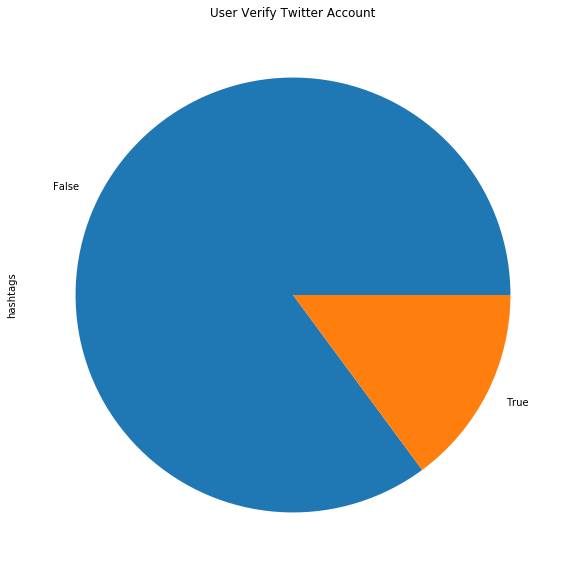

In [188]:
#vaccineTweet_DF['senti_score'].value_counts().plot(kind='pie')
user_verify_plot = vaccineTweet_DF.groupby('user_verified').hashtags.count()
user_verify_plot.plot(kind='pie', title='User Verify Twitter Account')

In [189]:
# Check top 20 locations (USER)
user_location = vaccineTweet_DF['user_location'].value_counts().index[:20]
user_location

Index(['Unknown', 'India', 'Email:talksavailable@gmail.com', 'London, England',
       'Mumbai, India', 'GP Partner, Watford ', 'United States', 'Türkiye',
       'La Belle Province', 'Global', 'France', 'Turkey-Israel', 'Canada',
       'Tweets on #Asia & USA  ', 'Chicago, IL', 'California, USA',
       'Moronto City Of #Morons Canada', 'Miami, FL', 'Amsterdam, Nederland',
       'Earth'],
      dtype='object')

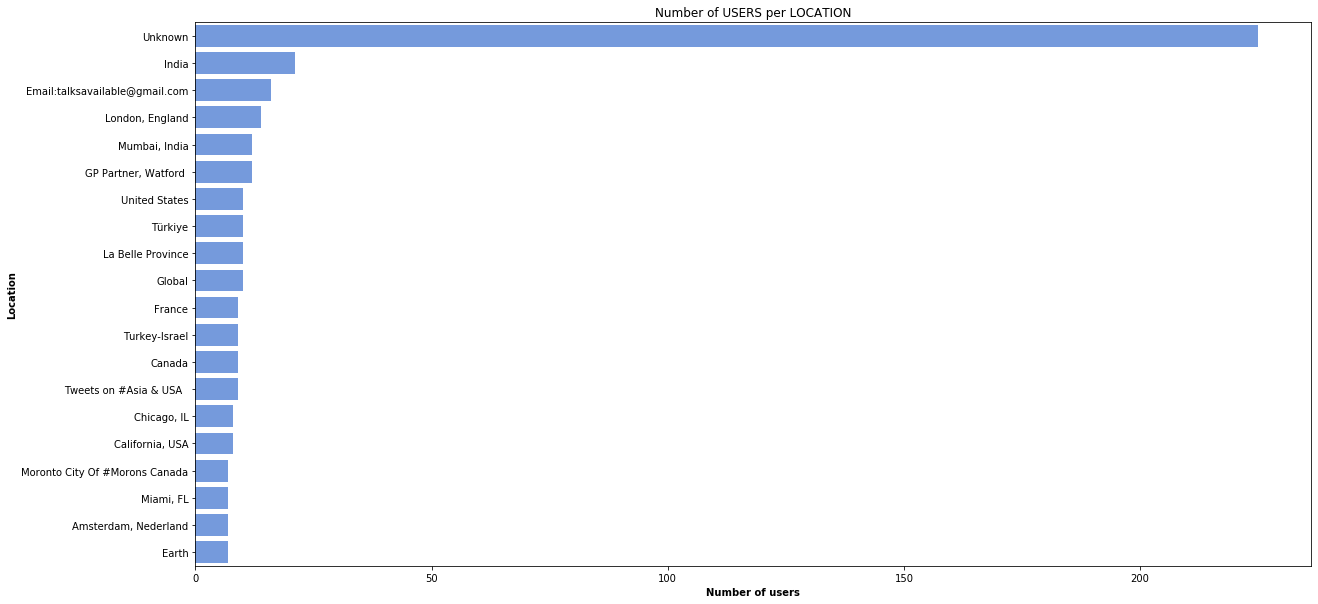

In [190]:
sns.countplot(y='user_location', data=vaccineTweet_DF, order=user_location, color='cornflowerblue')
plt.title('Number of USERS per LOCATION', loc='center')
plt.xlabel('Number of users', weight='bold')
plt.ylabel('Location', weight='bold')
plt.show()

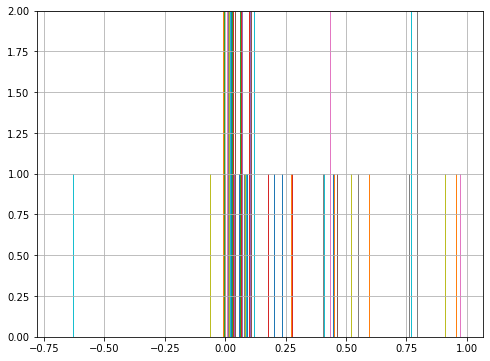

In [191]:
# Analize Polarity & Subjetivity together
fig, ax = plt.subplots(figsize=(8,6), sharex=True)
plt.ylim(0,2)
vaccineTweet_DF['senti_score'].hist(ax=ax)

In [192]:
# Analizing Polarity and Subjetivity separate
sentiment_series = vaccineTweet_DF['senti_score'].tolist()
cols = ['Polarity', 'Subjetivity']
sentimentDF = pd.DataFrame(sentiment_series, columns=cols, index=vaccineTweet_DF.index)
sentimentDF.head()

,Polarity,Subjetivity
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.000000
3,-0.5,0.900000
4,0.0,0.033333


In [193]:
# remove all 0.00 's 
sentimentDF = sentimentDF.loc[(sentimentDF != 0).any(axis=1)].reset_index(drop=True)
sentimentDF

,Polarity,Subjetivity
0,-0.500,0.900000
1,0.000,0.033333
2,0.100,0.550000
3,0.400,0.250000
4,-0.100,0.500000
...,...,...
563,0.375,0.750000
564,0.250,0.333333
565,0.250,0.333333
566,0.000,0.033333


Text(0, 0.5, 'Number of Times')

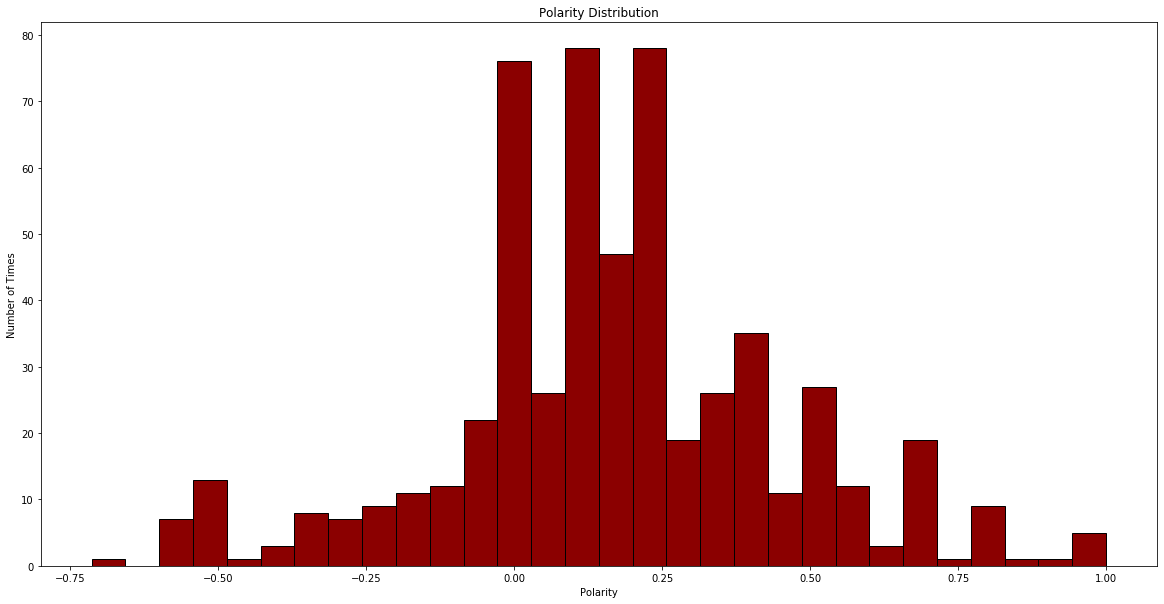

In [194]:
# Polarity Distribution
plt.hist(sentimentDF['Polarity'], color='darkred', edgecolor='black', density=False, bins= int(30))
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Number of Times')

Text(0.5, 1.0, 'Subjetivity Distribution')

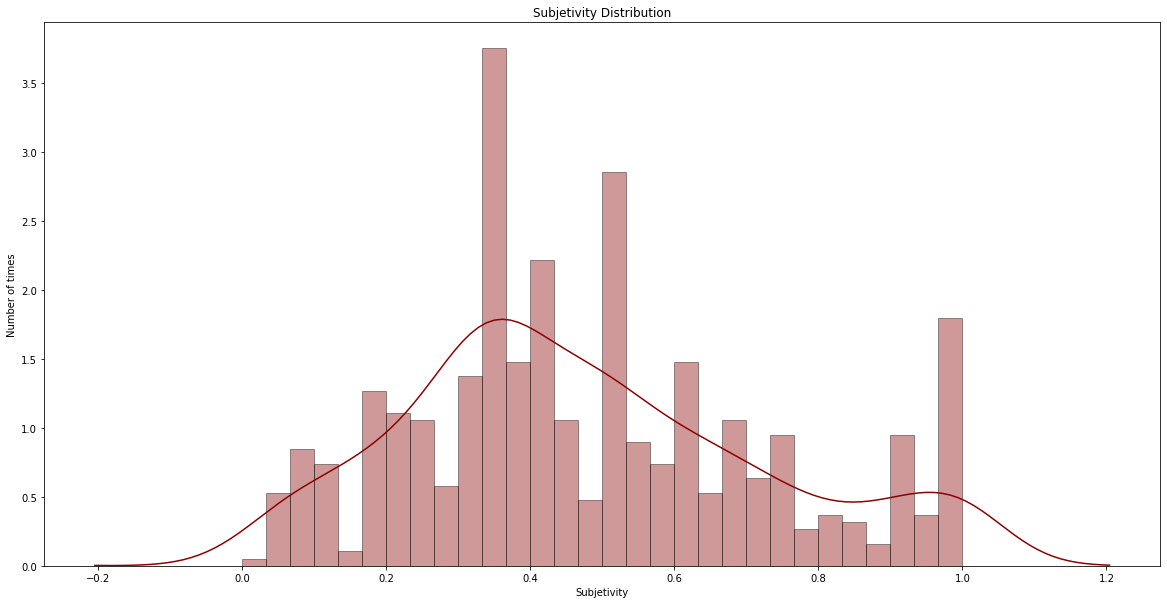

In [195]:
#Subjetivity Distribution
sns.distplot(sentimentDF['Subjetivity'], hist=True, kde=True, bins=int(30), color='darkred', hist_kws={'edgecolor':
                                                                                                   'black'}, axlabel='Subjetivity')
plt.xlabel('Subjetivity')
plt.ylabel('Number of times')
plt.title('Subjetivity Distribution')